In [61]:
import matplotlib.pyplot as plt
import pandas as pd
from math import log, e
from scipy import stats

In [62]:
def bsm(stock_price, strike_price, rate, time, volatility, dividend=0):

    d1 = (log(stock_price / strike_price) + (rate - dividend + volatility ** 2 / 2) * time) / (volatility * time ** .5)
    d2 = d1 - volatility * time ** .5

    call_option = stats.norm.cdf(d1) * stock_price * e ** (-dividend * time) - stats.norm.cdf(d2) * strike_price * e ** (
            -rate * time)

    return call_option

In [63]:
stockData = pd.read_csv('/Users/krylovalexey/Downloads/archive/stock_data.csv').sort_values('date')
test = stockData.query("ticker == 'sh600000' and date >= '2021-01-01' and date <= '2021-6-30'")

In [64]:
first_day = test[0:1]

In [65]:
def get_mid(data):
    return (data['high'] + data['low']) / 2.0

In [66]:
my_stock_price = get_mid(first_day)
strike_price = 9.5
rf_rate = first_day['close'] * .01
volatility = 0.30
t = 0.5 # 6 месяцев
dividend = 0 # условно принимаем за 0
print(f'浦发银行 цена закрытия акции: {my_stock_price.values} в первый день')

浦发银行 цена закрытия акции: [9.175] в первый день


In [67]:
call_option = bsm(
    stock_price=my_stock_price.values,
    strike_price=strike_price,
    rate=rf_rate.values,
    time=t,
    volatility=volatility,
    dividend=dividend)

print(f'BSM оценка на 6 месяцев для 浦发银行 call опциона: ${1000 * call_option}')

BSM оценка на 6 месяцев для 浦发银行 call опциона: $[823.25344676]


In [68]:
my_holdings = my_stock_price.values * 1000
print(f'Текущий объем портфеля: {my_holdings}')

Текущий объем портфеля: [9175.]


In [69]:
premuium_yield = (call_option * 1000) / my_holdings

print(f'Премия за продажу покрытого колла составляет: {premuium_yield * 1000}')

Премия за продажу покрытого колла составляет: [89.7278961]


In [70]:
stock_price = get_mid(test)
cov_call = [(stock + call_option) * 1000 if (stock + call_option) * 1000 < (strike_price + call_option) * 1000 else (strike_price + call_option) * 1000 for
            stock in stock_price]

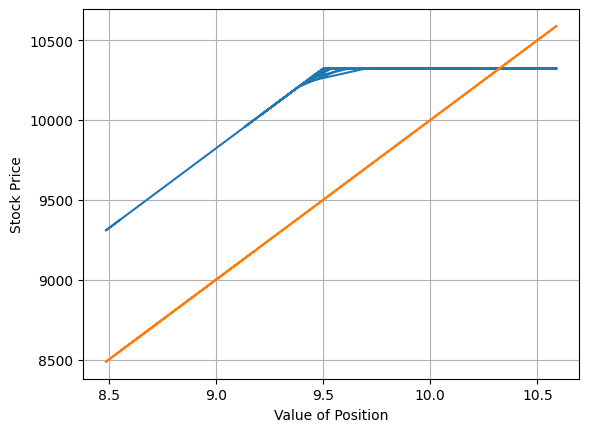

In [72]:
plt.plot(get_mid(test), cov_call)
plt.plot(stock_price, stock_price * 1000)

plt.xlabel('Value of Position')
plt.ylabel('Stock Price')
plt.grid()